Exploratory Data Analysis Project: 
=============
* Class Group: G6 
* Project Group: 2 
* Names: 
 - BILAL MOTASSIM
 - ELBOUZIDI HAMZA
* Dataset: Disney

Table of contents
=========
* [Preparing the environment](#Preparing-the-environment)
* [Exploring the dataset](#Exploring-the-dataset)
* [Top 5 best categories](#Top-5-best-categories)
* [Top 5 directors](#Top-5-directors)
* [Top 10 casts](#Top-10-casts)
* [Top 5 TV Shows](#Top-5-TV-Shows)
* [Identifying similar content](#Identifying-similar-content)
* [Disney's focus](#Disney's-focus)


# Preparing the environment

* Importing `pandas` and `matplotlib`

In [10]:
import pandas as pd 
import matplotlib.pylab as plt

* using `ggplot` style to display our plots

In [11]:
plt.style.use('ggplot')

* Reading the `disney.csv` file and making a DataFrame `ds` out of it

In [6]:
ds = pd.read_csv('disney.csv')

# Exploring the dataset

* using `shape` method to display the number of rows and columns in the dataset

In [7]:
ds.shape

(1450, 12)

* `head` allows us to display the 5 first columns, we can specifie how many we want

In [8]:
ds.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Duck the Halls: A Mickey Mouse Christmas Special,"Alonso Ramirez Ramos, Dave Wasson","Chris Diamantopoulos, Tony Anselmo, Tress MacN...",NaN,"November 26, 2021",2016,TV-G,23 min,"Animation, Family",Join Mickey and the gang as they duck the halls!
1,s2,Movie,Ernest Saves Christmas,John Cherry,"Jim Varney, Noelle Parker, Douglas Seale",NaN,"November 26, 2021",1988,PG,91 min,Comedy,Santa Claus passes his magic bag to a new St. ...
2,s3,Movie,Ice Age: A Mammoth Christmas,Karen Disher,"Raymond Albert Romano, John Leguizamo, Denis L...",United States,"November 26, 2021",2011,TV-G,23 min,"Animation, Comedy, Family",Sid the Sloth is on Santa's naughty list.
3,s4,Movie,The Queen Family Singalong,Hamish Hamilton,"Darren Criss, Adam Lambert, Derek Hough, Alexa...",NaN,"November 26, 2021",2021,TV-PG,41 min,Musical,"This is real life, not just fantasy!"
4,s5,TV Show,The Beatles: Get Back,NaN,"John Lennon, Paul McCartney, George Harrison, ...",NaN,"November 25, 2021",2021,NaN,1 Season,"Docuseries, Historical, Music",A three-part documentary from Peter Jackson ca...


* using `columns` to show the columns we have in the dataset

In [13]:
ds.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

* `dtypes` allows us to see the type of every column

In [14]:
ds.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

* i noticed that the `date_added` column is `object` type so i decided to convert it to `datetime` using the `to_datetime` pandas method

In [14]:
ds['date_added'] = pd.to_datetime(ds['date_added'])

In [15]:
ds.dtypes

show_id                 object
type                    object
title                   object
director                object
cast                    object
country                 object
date_added      datetime64[ns]
release_year             int64
rating                  object
duration                object
listed_in               object
description             object
dtype: object

* we can see it converted successfully

In [16]:
ds['date_added'].head(2)

0   2021-11-26
1   2021-11-26
Name: date_added, dtype: datetime64[ns]

* using `isna` and `sum` to show the number of null values on each column

In [18]:
ds.isna().sum()

show_id           0
type              0
title             0
director        473
cast            190
country         219
date_added        3
release_year      0
rating            3
duration          0
listed_in         0
description       0
dtype: int64

* Locating the duplicates in the dataset using `duplicated` that returns `True` if the row is duplicated, and `loc` locates these rows and displays them, we can see that there are no duplicates

In [19]:
ds.loc[ds.duplicated()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description


* using `query` to show shows that have been released in 2021

In [26]:
ds.query('release_year == 2021')

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
3,s4,Movie,The Queen Family Singalong,Hamish Hamilton,"Darren Criss, Adam Lambert, Derek Hough, Alexa...",NaN,2021-11-26,2021,TV-PG,41 min,Musical,"This is real life, not just fantasy!"
4,s5,TV Show,The Beatles: Get Back,NaN,"John Lennon, Paul McCartney, George Harrison, ...",NaN,2021-11-25,2021,NaN,1 Season,"Docuseries, Historical, Music",A three-part documentary from Peter Jackson ca...
5,s6,Movie,Becoming Cousteau,Liz Garbus,"Jacques Yves Cousteau, Vincent Cassel",United States,2021-11-24,2021,PG-13,94 min,"Biographical, Documentary",An inside look at the legendary life of advent...
6,s7,TV Show,Hawkeye,NaN,"Jeremy Renner, Hailee Steinfeld, Vera Farmiga,...",NaN,2021-11-24,2021,TV-14,1 Season,"Action-Adventure, Superhero",Clint Barton/Hawkeye must team up with skilled...
14,s15,Movie,America the Beautiful,NaN,Michael B. Jordan,NaN,2021-11-12,2021,TV-PG,2 min,Animals & Nature,"Epic, grand portrait of the land across four r..."
...,...,...,...,...,...,...,...,...,...,...,...,...
301,s302,Movie,Marvel's Behind the Mask,NaN,NaN,NaN,2021-02-12,2021,TV-14,65 min,"Anthology, Documentary",A documentary special exploring the power of i...
310,s311,TV Show,Pixar Popcorn,NaN,"Ellen DeGeneres, Craig T. Nelson, Holly Hunter...",United States,2021-01-22,2021,TV-PG,1 Season,"Animation, Anthology, Family",Grab a quick snack of Pixar with this collecti...
315,s316,TV Show,WandaVision,NaN,"Elizabeth Olsen, Paul Bettany, Teyonah Parris,...",United States,2021-01-15,2021,TV-14,1 Season,"Drama, Fantasy, Mystery",Two super-powered beings living idealized subu...
318,s319,TV Show,Marvel Studios LEGENDS,NaN,NaN,United States,2021-01-08,2021,TV-14,1 Season,"Action-Adventure, Docuseries, Fantasy",Marvel Studios LEGENDS celebrates the heroes a...


* `value_counts` allows to show the row count of each value of the column specified, here we have a decending list of every year and the number of shows released

In [26]:
ds['release_year'].value_counts().head(10)

2021    125
2020    114
2019     99
2017     69
2018     65
2016     61
2011     52
2014     50
2015     46
2012     41
Name: release_year, dtype: int64

* Here we use the `plot` method to make a bar plot using the previous data, that shows the top 10 years by shows released

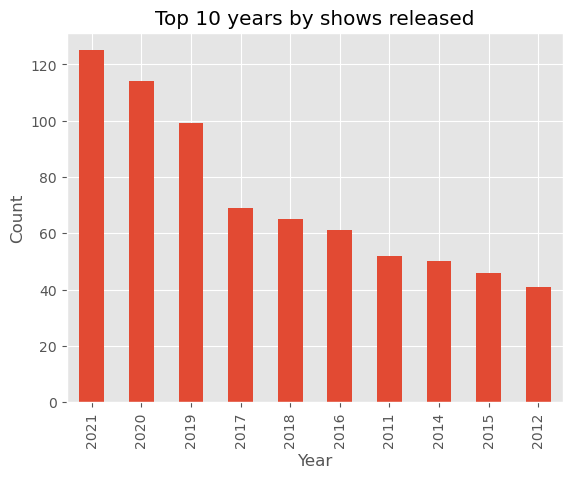

In [25]:
ax = ds['release_year'].value_counts() \
    .head(10) \
    .plot(kind='bar' , title='Top 10 years by shows released')
ax.set_xlabel('Year')
ax.set_ylabel('Count')
plt.show()

# Top 5 best categories

* renaming the categorie column using `rename`

In [28]:
ds = ds.rename(columns={'listed_in': 'cat'})

In [29]:
ds.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,cat,description
0,s1,Movie,Duck the Halls: A Mickey Mouse Christmas Special,"Alonso Ramirez Ramos, Dave Wasson","Chris Diamantopoulos, Tony Anselmo, Tress MacN...",NaN,2021-11-26,2016,TV-G,23 min,"Animation, Family",Join Mickey and the gang as they duck the halls!
1,s2,Movie,Ernest Saves Christmas,John Cherry,"Jim Varney, Noelle Parker, Douglas Seale",NaN,2021-11-26,1988,PG,91 min,Comedy,Santa Claus passes his magic bag to a new St. ...
2,s3,Movie,Ice Age: A Mammoth Christmas,Karen Disher,"Raymond Albert Romano, John Leguizamo, Denis L...",United States,2021-11-26,2011,TV-G,23 min,"Animation, Comedy, Family",Sid the Sloth is on Santa's naughty list.
3,s4,Movie,The Queen Family Singalong,Hamish Hamilton,"Darren Criss, Adam Lambert, Derek Hough, Alexa...",NaN,2021-11-26,2021,TV-PG,41 min,Musical,"This is real life, not just fantasy!"
4,s5,TV Show,The Beatles: Get Back,NaN,"John Lennon, Paul McCartney, George Harrison, ...",NaN,2021-11-25,2021,NaN,1 Season,"Docuseries, Historical, Music",A three-part documentary from Peter Jackson ca...


* we notice that the categories are in a string seperated by `,`

In [37]:
ds['cat'].head(8)

0                Animation, Family
1                           Comedy
2        Animation, Comedy, Family
3                          Musical
4    Docuseries, Historical, Music
5        Biographical, Documentary
6      Action-Adventure, Superhero
7    Docuseries, Reality, Survival
Name: cat, dtype: object

* to solve this problem we use `str.split(',')` to turn the string into a list of categories

In [31]:
ds['cat'] = ds['cat'].str.split(',')

* `explode` makes duplicates of the same row with diffrente categories

In [32]:
ex = ds.explode('cat')

* `value_counts` allows to show the row count of each value of the column specified, here we have a decending list of every categorie, `head(5)` gets the top five of the list, `plot` displays the data we got in a `bar` plot

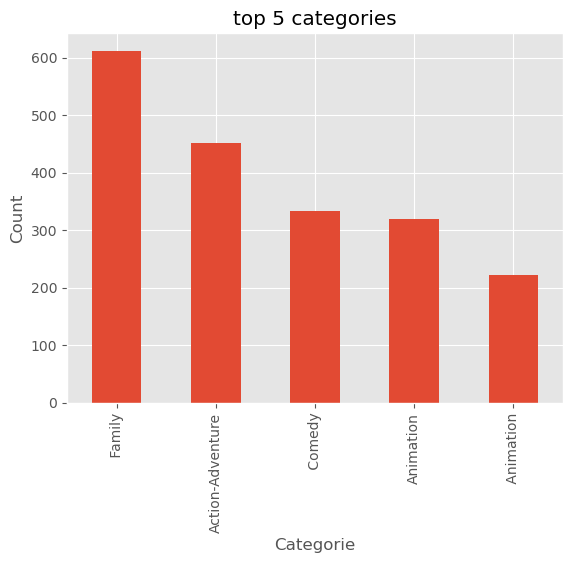

In [33]:
ax = ex['cat'].value_counts() \
    .head(5) \
    .plot(kind='bar' , title='top 5 categories')
ax.set_xlabel('Categorie')
ax.set_ylabel('Count')
plt.show()

# Top 5 directors

* i noticed that some shows have multiple directors, and they are seperated by `,` so we use `str.split(',')` to split them and turn them into a list

In [48]:
ds['director'] = ds['director'].str.split(',')

* `explode` to give each director a row

In [50]:
ex = ds.explode('director')

* `value_counts` gives us a list of directors how many shows the produced

In [52]:
ex['director'].value_counts()

Jack Hannah          17
John Lasseter        16
Paul Hoen            16
Wilfred Jackson      14
Charles Nichols      12
                     ..
 Tad Stones           1
Toby Shelton          1
Michael Mayer         1
Sigmund Spath Jr.     1
Mark Waring           1
Name: director, Length: 673, dtype: int64

* displaying the top 5 directors in a bar type plot

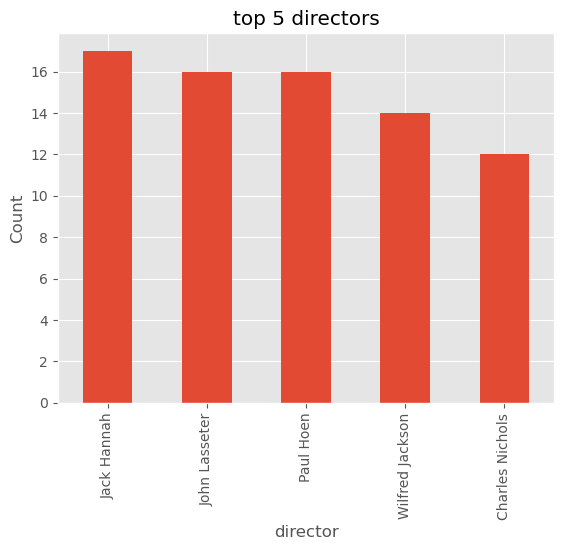

In [55]:
ax = ex['director'].value_counts() \
    .head(5) \
    .plot(kind='bar' , title='top 5 directors')
ax.set_xlabel('director')
ax.set_ylabel('Count')
plt.show()

# Top 10 casts

* casts are seperated by `,` so we use `str.split(',')` to turn them into a list

In [35]:
ds['cast'] = ds['cast'].str.split(',')

In [36]:
ds['cast'].head()

0    [Chris Diamantopoulos,  Tony Anselmo,  Tress M...
1         [Jim Varney,  Noelle Parker,  Douglas Seale]
2    [Raymond Albert Romano,  John Leguizamo,  Deni...
3    [Darren Criss,  Adam Lambert,  Derek Hough,  A...
4    [John Lennon,  Paul McCartney,  George Harriso...
Name: cast, dtype: object

* we give each cast a row using `explode`

In [37]:
ex = ds.explode('cast')

* showing each cast and the number of shows they're in

In [38]:
ex['cast'].value_counts()

 Jim Cummings       24
 Corey Burton       15
Walt Disney         15
 Jeff Bennett       14
 Tress MacNeille    14
                    ..
 Lance Henriksen     1
Benjamin Bratt       1
 Eva Longoria        1
 Carlos Rivera       1
Charlie Tahan        1
Name: cast, Length: 4057, dtype: int64

* using the previous data to show the top 10 casts in a bar plot

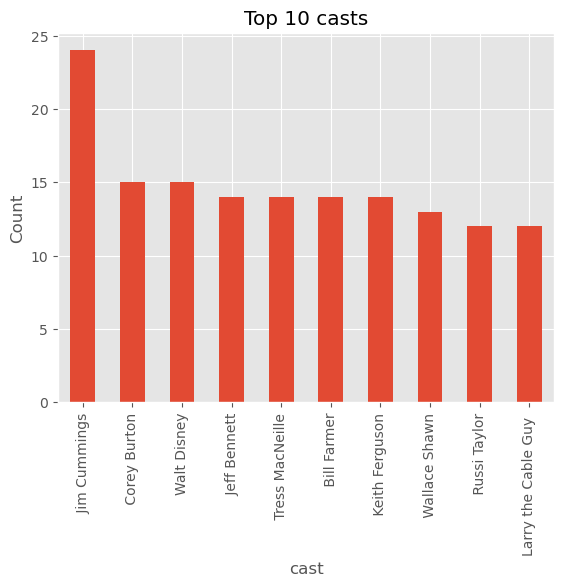

In [40]:
ax = ex['cast'].value_counts() \
    .head(10) \
    .plot(kind='bar' , title='Top 10 casts')
ax.set_xlabel('cast')
ax.set_ylabel('Count')
plt.show()

# Top 5 TV Shows

* getting TV Shows from our dataset using `query` and copying it to `series` using `copy()`

In [41]:
series = ds.query('type == "TV Show"').copy()
series.head(10)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,cat,description
4,s5,TV Show,The Beatles: Get Back,NaN,"[John Lennon, Paul McCartney, George Harriso...",NaN,2021-11-25,2021,NaN,1 Season,"[Docuseries, Historical, Music]",A three-part documentary from Peter Jackson ca...
6,s7,TV Show,Hawkeye,NaN,"[Jeremy Renner, Hailee Steinfeld, Vera Farmi...",NaN,2021-11-24,2021,TV-14,1 Season,"[Action-Adventure, Superhero]",Clint Barton/Hawkeye must team up with skilled...
7,s8,TV Show,Port Protection Alaska,NaN,"[Gary Muehlberger, Mary Miller, Curly Leach,...",United States,2021-11-24,2015,TV-14,2 Seasons,"[Docuseries, Reality, Survival]",Residents of Port Protection must combat volat...
8,s9,TV Show,Secrets of the Zoo: Tampa,NaN,"[Dr. Ray Ball, Dr. Lauren Smith, Chris Massa...",United States,2021-11-24,2019,TV-PG,2 Seasons,"[Animals & Nature, Docuseries, Family]",A day in the life at ZooTampa is anything but ...
13,s14,TV Show,"Dr. Oakley, Yukon Vet",NaN,"[Dr. Michelle Oakley, Zachary Fine]",United States,2021-11-17,2013,TV-PG,10 Seasons,"[Action-Adventure, Animals & Nature, Docuser...","Meet Dr. Michelle Oakley, vet to pretty much e..."
17,s18,TV Show,Disney Fancy Nancy,NaN,"[Mia Jenness, Alyson Hannigan, Rob Riggle, ...","United States, Canada",2021-11-12,2018,TV-PG,3 Seasons,"[Animation, Kids]",Nancy makes every day extraordinary!
18,s19,TV Show,Disney Intertwined,NaN,"[Carolina Domenech, José Jiménez Zapiola, Ke...",NaN,2021-11-12,2021,TV-PG,1 Season,"[Comedy, Coming of Age, Drama]",Allegra is ready to change the past in order t...
28,s29,TV Show,Olaf Presents,NaN,[Josh Gad],NaN,2021-11-12,2021,TV-PG,1 Season,"[Animation, Family]",Olaf goes from snowman to showman for his uniq...
51,s52,TV Show,Disney Amphibia,NaN,"[Justin Felbinger, Amanda Leighton, Bill Far...","United States, South Korea",2021-11-03,2018,TV-Y7,3 Seasons,"[Animation, Comedy, Family]",Anne Boonchuy is transported to the world of A...
52,s53,TV Show,Photo Ark,NaN,[Joel Sartore],United States,2021-11-03,2017,TV-PG,1 Season,"[Animals & Nature, Docuseries, Family]",National Geographic photographer Joel Sartore ...


* we noticed that the number of seasons is in a string in duration, so we extract it using `str.extract` and we add it to a new column `Seasons_Number` 

In [42]:
series['Seasons_Number'] = series['duration'].str.extract(r'(\d+)')

In [43]:
series.head(10)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,cat,description,Seasons_Number
4,s5,TV Show,The Beatles: Get Back,NaN,"[John Lennon, Paul McCartney, George Harriso...",NaN,2021-11-25,2021,NaN,1 Season,"[Docuseries, Historical, Music]",A three-part documentary from Peter Jackson ca...,1
6,s7,TV Show,Hawkeye,NaN,"[Jeremy Renner, Hailee Steinfeld, Vera Farmi...",NaN,2021-11-24,2021,TV-14,1 Season,"[Action-Adventure, Superhero]",Clint Barton/Hawkeye must team up with skilled...,1
7,s8,TV Show,Port Protection Alaska,NaN,"[Gary Muehlberger, Mary Miller, Curly Leach,...",United States,2021-11-24,2015,TV-14,2 Seasons,"[Docuseries, Reality, Survival]",Residents of Port Protection must combat volat...,2
8,s9,TV Show,Secrets of the Zoo: Tampa,NaN,"[Dr. Ray Ball, Dr. Lauren Smith, Chris Massa...",United States,2021-11-24,2019,TV-PG,2 Seasons,"[Animals & Nature, Docuseries, Family]",A day in the life at ZooTampa is anything but ...,2
13,s14,TV Show,"Dr. Oakley, Yukon Vet",NaN,"[Dr. Michelle Oakley, Zachary Fine]",United States,2021-11-17,2013,TV-PG,10 Seasons,"[Action-Adventure, Animals & Nature, Docuser...","Meet Dr. Michelle Oakley, vet to pretty much e...",10
17,s18,TV Show,Disney Fancy Nancy,NaN,"[Mia Jenness, Alyson Hannigan, Rob Riggle, ...","United States, Canada",2021-11-12,2018,TV-PG,3 Seasons,"[Animation, Kids]",Nancy makes every day extraordinary!,3
18,s19,TV Show,Disney Intertwined,NaN,"[Carolina Domenech, José Jiménez Zapiola, Ke...",NaN,2021-11-12,2021,TV-PG,1 Season,"[Comedy, Coming of Age, Drama]",Allegra is ready to change the past in order t...,1
28,s29,TV Show,Olaf Presents,NaN,[Josh Gad],NaN,2021-11-12,2021,TV-PG,1 Season,"[Animation, Family]",Olaf goes from snowman to showman for his uniq...,1
51,s52,TV Show,Disney Amphibia,NaN,"[Justin Felbinger, Amanda Leighton, Bill Far...","United States, South Korea",2021-11-03,2018,TV-Y7,3 Seasons,"[Animation, Comedy, Family]",Anne Boonchuy is transported to the world of A...,3
52,s53,TV Show,Photo Ark,NaN,[Joel Sartore],United States,2021-11-03,2017,TV-PG,1 Season,"[Animals & Nature, Docuseries, Family]",National Geographic photographer Joel Sartore ...,1


* we see that `Seasons_Number` column is `object` type so we need to convert it


In [75]:
series.dtypes

show_id                   object
type                      object
title                     object
director                  object
cast                      object
country                   object
date_added        datetime64[ns]
release_year               int64
rating                    object
duration                  object
cat                       object
description               object
Seasons_Number            object
dtype: object

* we used `to_numeric` to convert `Seasons_Number` column to `int64`

In [44]:
series['Seasons_Number'] = pd.to_numeric(series['Seasons_Number'])

In [77]:
series.dtypes

show_id                   object
type                      object
title                     object
director                  object
cast                      object
country                   object
date_added        datetime64[ns]
release_year               int64
rating                    object
duration                  object
cat                       object
description               object
Seasons_Number             int64
dtype: object

* getting the title of the show and the number of seasons it has, sorted by `Seasons_Number` desending

In [46]:
series[['title', 'Seasons_Number']].sort_values(by=['Seasons_Number'], ascending=False).head(5)

,title,Seasons_Number
92,The Simpsons,32
115,The Incredible Dr. Pol,19
106,Life Below Zero,16
216,Wicked Tuna,10
13,"Dr. Oakley, Yukon Vet",10


* we use the data we got and display it in a bar plot

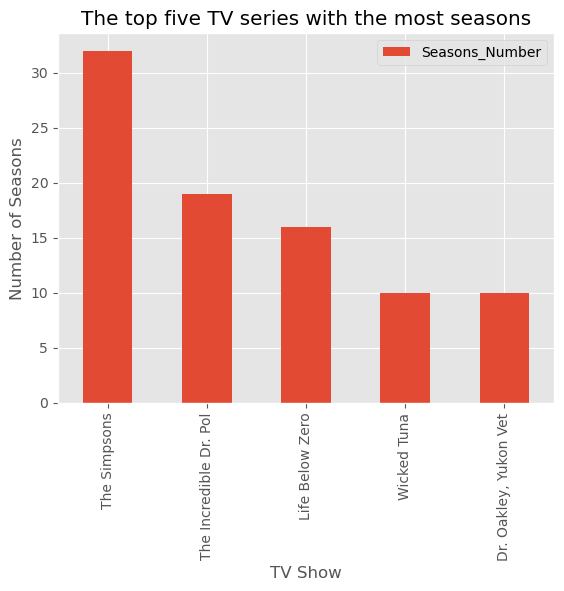

In [94]:
ax = series[['title', 'Seasons_Number']].sort_values(by=['Seasons_Number'], ascending=False) \
    .head(5) \
    .plot(x='title', y='Seasons_Number', kind='bar' , title='The top five TV series with the most seasons')
ax.set_xlabel('TV Show')
ax.set_ylabel('Number of Seasons')
plt.show()

# Identifying similar content

In [100]:
ds.loc[ds.duplicated(subset='description')]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,cat,description
700,s701,Movie,Coco (in Spanish),[Lee Unkrich],"[Anthony Gonzalez, Gael García Bernal, Benja...",NaN,2019-11-29,2017,PG,105 min,"[Animation, Family, Fantasy]",Miguel journeys to the magical land of his anc...
799,s800,TV Show,Coop & Cami Ask The World (Shorts),NaN,NaN,NaN,2019-11-12,2018,TV-G,1 Season,"[Comedy, Family, Game Show / Competition]","Cooper and Cami Wrather co-host ""Would You Wra..."


In [107]:
ds.loc[ds.duplicated(subset='title')]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,cat,description


# Disney's focus

* to see what disney have been focusing on in the past years we need to extract the number of tv shows and movies released each year

* we get the shows released after 2017 and copy them into `last4years`

In [49]:
last4years = ds.query('release_year > 2017').copy()

* grouping `last4years` by `release_year` and `type` and getting the count of every type on every year using `count()`

In [50]:
l4 = last4years.groupby(['release_year','type']).count()

* using `pivot_table` to make a pivot table `pvtable` using the data we grouped

In [51]:
pvtable = l4.pivot_table(index='release_year', columns='type', values='show_id')

In [52]:
pvtable

type,Movie,TV Show
release_year,,
2018,32,33
2019,61,38
2020,74,40
2021,70,55


* we display `pvtable` in a bar plot

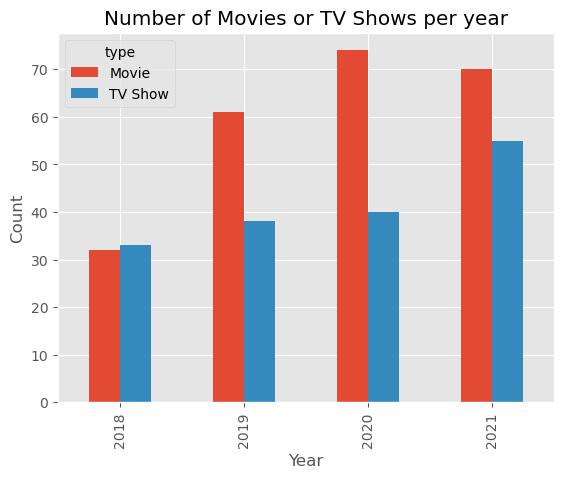

In [53]:
ax = pvtable.plot(kind='bar', title='Number of Movies or TV Shows per year')
ax.set_xlabel('Year')
ax.set_ylabel('Count')
plt.show()

* from the result we got, we can say that disney had been focusing on making movies a lot these past years